# IMB Alltoall performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "Alltoall"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                    Perf              \
                                                     min      median   
System                Nodes Processes Size                             
ARCHER2_CrayMPICH8015 1     128       0             0.05        0.05   
                                      1            25.21       25.21   
                                      2            25.75       25.75   
                                      4            25.11       25.11   
                                      8            27.47       27.47   
...                                                  ...         ...   
Tesseract_IMPI181     32    768       32768    133738.01   133738.01   
                                      65536    246866.17   246866.17   
                                      131072   468423.98   468423.98   
                                      262144   941297.67   941297.67   
                                      524288  1883925.76  188392

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


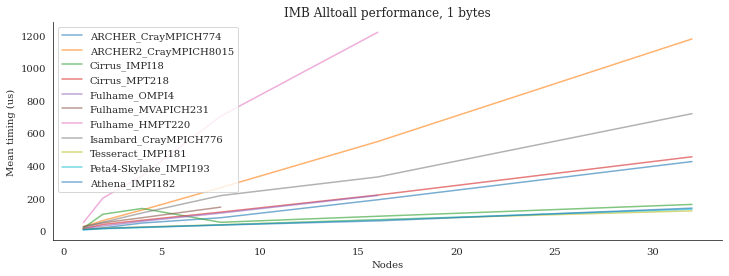

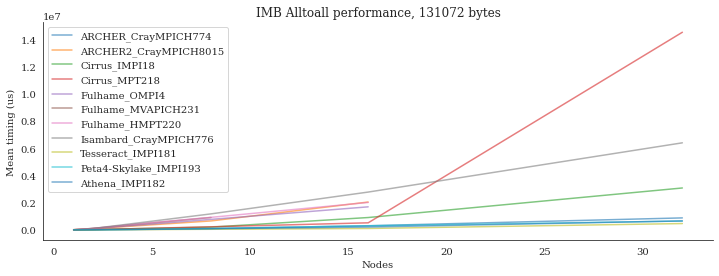

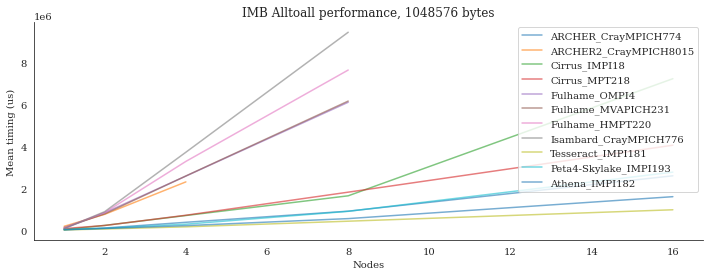

In [6]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Mean timing (us)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()
    

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


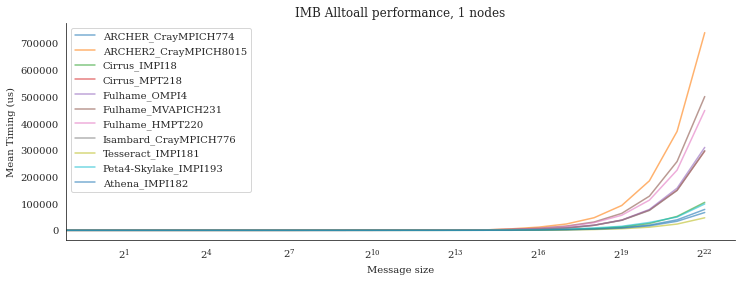

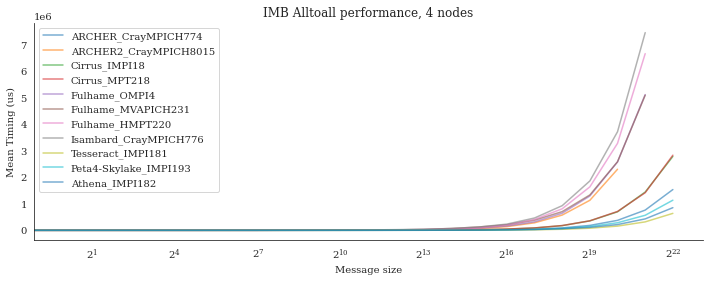

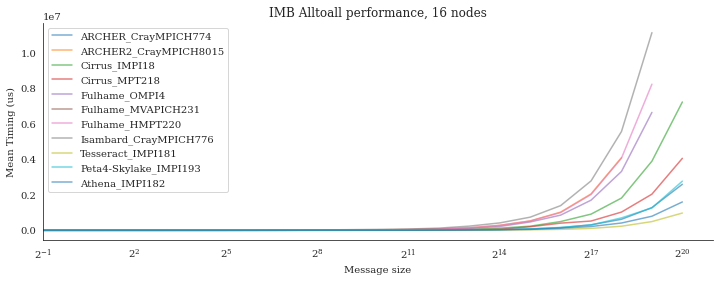

In [7]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Mean Timing (us)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [8]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=True)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     1.000     1.000     1.000     1.000     1.000     1.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000